In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import saxpy
import tslearn
from datetime import datetime

In [2]:
missing_values = ["n/a", "na", "--"]

In [3]:
stockdata = pd.read_csv("StockDataFinal.csv", sep = ",", na_values = missing_values)
golddata = pd.read_csv("GoldDataFinal.csv", sep = ",",na_values = missing_values)
silverdata = pd.read_csv("SilverDataFinal.csv", sep = ",",na_values = missing_values)
oildata = pd.read_csv("OilDataFinal.csv", sep = ",",na_values = missing_values)
gasdata = pd.read_csv("GasDataFinal.csv", sep = ",",na_values = missing_values)

In [ ]:
stock_missing = stockdata.isnull().sum()
gold_missing = golddata.isnull().sum()
silver_missing = silverdata.isnull().sum()
oil_missing = oildata.isnull().sum()
gas_missing = gasdata.isnull().sum()

In [4]:
stockdata.index = [pd.to_datetime(stockdata["stockdate"]),stockdata["sector"],stockdata["subsector"]]
gasdata.index = pd.to_datetime(gasdata["gasdate"])
golddata.index = pd.to_datetime(golddata["golddate"])
oildata.index = pd.to_datetime(oildata["oildate"])
silverdata.index = pd.to_datetime(silverdata["silverdate"])

In [4]:
stockdata.dtypes

Id               int64
stockdate       object
sector          object
subsector       object
companyname     object
stockcode       object
openprice      float64
highprice      float64
lowprice       float64
lastprice      float64
volume           int64
created_at      object
dtype: object

In [8]:
stockdata.describe

<bound method NDFrame.describe of             Id            stockdate       sector     subsector companyname  \
0            1  2015-03-11 16:00:00  main_market    healthcare     ADVENTA   
1            2  2015-03-12 16:00:00  main_market    healthcare     ADVENTA   
2            3  2015-03-15 16:00:00  main_market    healthcare     ADVENTA   
3            4  2015-03-16 16:00:00  main_market    healthcare     ADVENTA   
4            5  2015-03-17 16:00:00  main_market    healthcare     ADVENTA   
5            6  2015-03-18 16:00:00  main_market    healthcare     ADVENTA   
6            7  2015-03-19 16:00:00  main_market    healthcare     ADVENTA   
7            8  2015-03-22 16:00:00  main_market    healthcare     ADVENTA   
8            9  2015-03-23 16:00:00  main_market    healthcare     ADVENTA   
9           10  2015-03-24 16:00:00  main_market    healthcare     ADVENTA   
10          11  2015-03-25 16:00:00  main_market    healthcare     ADVENTA   
11          12  2015-03-26 16:

In [5]:
stock_df.drop(["Id", "stockdate","created_at","sector","subsector"], axis=1, inplace=True)
gas_df.drop(["Id", "gasdate","created_at"], axis=1, inplace=True)
gold_df.drop(["Id", "golddate","created_at"], axis=1, inplace=True)
oil_df.drop(["Id", "oildate","created_at"], axis=1, inplace=True)
silver_df.drop(["Id", "silverdate","created_at"], axis=1, inplace=True)

In [7]:
stock_df1 = stockdata.loc[((stock_df.index.get_level_values("stockdate")>=("2015-04-01 16:00:00")) & (stock_df.index.get_level_values("stockdate")<=("2019-04-15 16:00:00")))]
stock_df1.shape

(957870, 7)

In [8]:
stock_df1.head()

,,,companyname,stockcode,openprice,highprice,lowprice,lastprice,volume
stockdate,sector,subsector,,,,,,,
2015-04-01 16:00:00,main_market,healthcare,ADVENTA,7191,0.930,0.95,0.930,0.95,3100
2015-04-02 16:00:00,main_market,healthcare,ADVENTA,7191,0.950,0.95,0.950,0.95,0
2015-04-05 16:00:00,main_market,healthcare,ADVENTA,7191,0.950,0.95,0.950,0.95,0
2015-04-06 16:00:00,main_market,healthcare,ADVENTA,7191,0.885,0.89,0.885,0.89,5000
2015-04-07 16:00:00,main_market,healthcare,ADVENTA,7191,0.900,0.90,0.900,0.90,2100


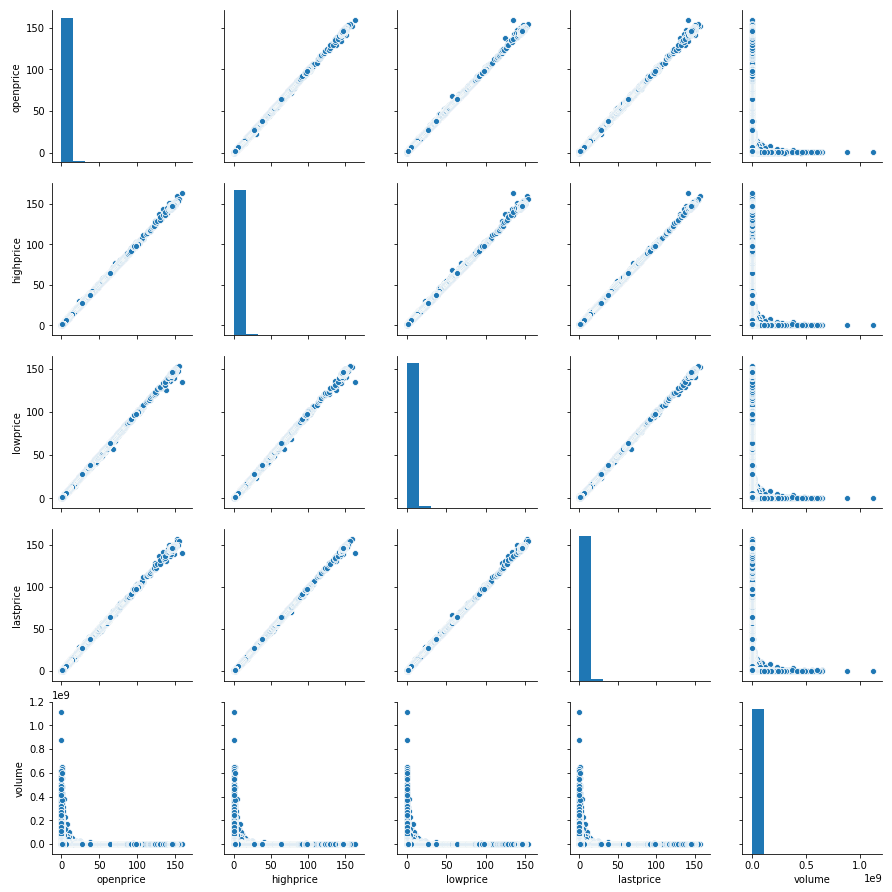

In [8]:
sns.pairplot(stock_df1)

In [8]:
stock_df1.index.get_level_values("sector").unique()

Index(['main_market', 'ace_market', 'bond_loan', 'warrants', 'etf'], dtype='object', name='sector')

In [9]:
main_market = stock_df1.loc[(stock_df1.index.get_level_values("sector")== "main_market")]
main_market.head()

,,,companyname,stockcode,openprice,highprice,lowprice,lastprice,volume
stockdate,sector,subsector,,,,,,,
2015-04-01 16:00:00,main_market,healthcare,ADVENTA,7191,0.930,0.95,0.930,0.95,3100
2015-04-02 16:00:00,main_market,healthcare,ADVENTA,7191,0.950,0.95,0.950,0.95,0
2015-04-05 16:00:00,main_market,healthcare,ADVENTA,7191,0.950,0.95,0.950,0.95,0
2015-04-06 16:00:00,main_market,healthcare,ADVENTA,7191,0.885,0.89,0.885,0.89,5000
2015-04-07 16:00:00,main_market,healthcare,ADVENTA,7191,0.900,0.90,0.900,0.90,2100


In [10]:
ace_market = stock_df1.loc[(stock_df1.index.get_level_values("sector")== "ace_market")]
ace_market.head()

,,,companyname,stockcode,openprice,highprice,lowprice,lastprice,volume
stockdate,sector,subsector,,,,,,,
2015-04-01 16:00:00,ace_market,healthcare,CAREPLS,0163,0.357,0.364,0.357,0.361,1464500
2015-04-02 16:00:00,ace_market,healthcare,CAREPLS,0163,0.371,0.387,0.371,0.380,7462600
2015-04-05 16:00:00,ace_market,healthcare,CAREPLS,0163,0.387,0.424,0.380,0.404,7103500
2015-04-06 16:00:00,ace_market,healthcare,CAREPLS,0163,0.404,0.414,0.404,0.407,1466300
2015-04-07 16:00:00,ace_market,healthcare,CAREPLS,0163,0.407,0.407,0.404,0.407,565200


In [11]:
bond_loan = stock_df1.loc[(stock_df1.index.get_level_values("sector")== "bond_loan")]
bond_loan.head()

,,,companyname,stockcode,openprice,highprice,lowprice,lastprice,volume
stockdate,sector,subsector,,,,,,,
2017-09-20 16:00:00,bond_loan,finance,AEONCR-LA,5139LA,1.20,1.20,1.15,1.17,984700
2017-09-24 16:00:00,bond_loan,finance,AEONCR-LA,5139LA,1.15,1.16,1.15,1.16,143300
2017-09-25 16:00:00,bond_loan,finance,AEONCR-LA,5139LA,1.16,1.16,1.15,1.16,226800
2017-09-26 16:00:00,bond_loan,finance,AEONCR-LA,5139LA,1.16,1.16,1.15,1.16,121900
2017-09-27 16:00:00,bond_loan,finance,AEONCR-LA,5139LA,1.15,1.16,1.15,1.15,364400


In [12]:
warrants = stock_df1.loc[(stock_df1.index.get_level_values("sector")== "warrants")]
warrants.head()

,,,companyname,stockcode,openprice,highprice,lowprice,lastprice,volume
stockdate,sector,subsector,,,,,,,
2018-09-06 16:00:00,warrants,healthcare,HARTA-C15,516815,0.170,0.175,0.165,0.165,606000
2018-09-11 16:00:00,warrants,healthcare,HARTA-C15,516815,0.170,0.170,0.150,0.150,1014800
2018-09-12 16:00:00,warrants,healthcare,HARTA-C15,516815,0.145,0.145,0.145,0.145,1000000
2018-09-13 16:00:00,warrants,healthcare,HARTA-C15,516815,0.150,0.150,0.145,0.150,1065000
2018-09-17 16:00:00,warrants,healthcare,HARTA-C15,516815,0.150,0.150,0.145,0.145,859600


In [13]:
etf = stock_df1.loc[(stock_df1.index.get_level_values("sector")== "etf")]
etf.head()

,,,companyname,stockcode,openprice,highprice,lowprice,lastprice,volume
stockdate,sector,subsector,,,,,,,
2015-04-01 16:00:00,etf,etfbond,ABFMY1,0800EA,1.06,1.06,1.06,1.06,0
2015-04-02 16:00:00,etf,etfbond,ABFMY1,0800EA,1.06,1.06,1.06,1.06,0
2015-04-05 16:00:00,etf,etfbond,ABFMY1,0800EA,1.06,1.06,1.06,1.06,0
2015-04-06 16:00:00,etf,etfbond,ABFMY1,0800EA,1.06,1.06,1.06,1.06,0
2015-04-07 16:00:00,etf,etfbond,ABFMY1,0800EA,1.06,1.06,1.06,1.06,0


In [15]:
main_market.index.get_level_values("subsector").unique()


Index(['healthcare', 'energy', 'tecnology', 'properties', 'utilities',
       'finance', 'telco_media', 'consumer', 'constructn', 'reits', 'ind-prod',
       'plantation', 'transport', 'specialpurposeacquis', 'closedfund'],
      dtype='object', name='subsector')

In [29]:
gas_df1 = gas_df.loc["2015-04-01":"2019-04-15"]
gas_df1.shape

(1032, 5)

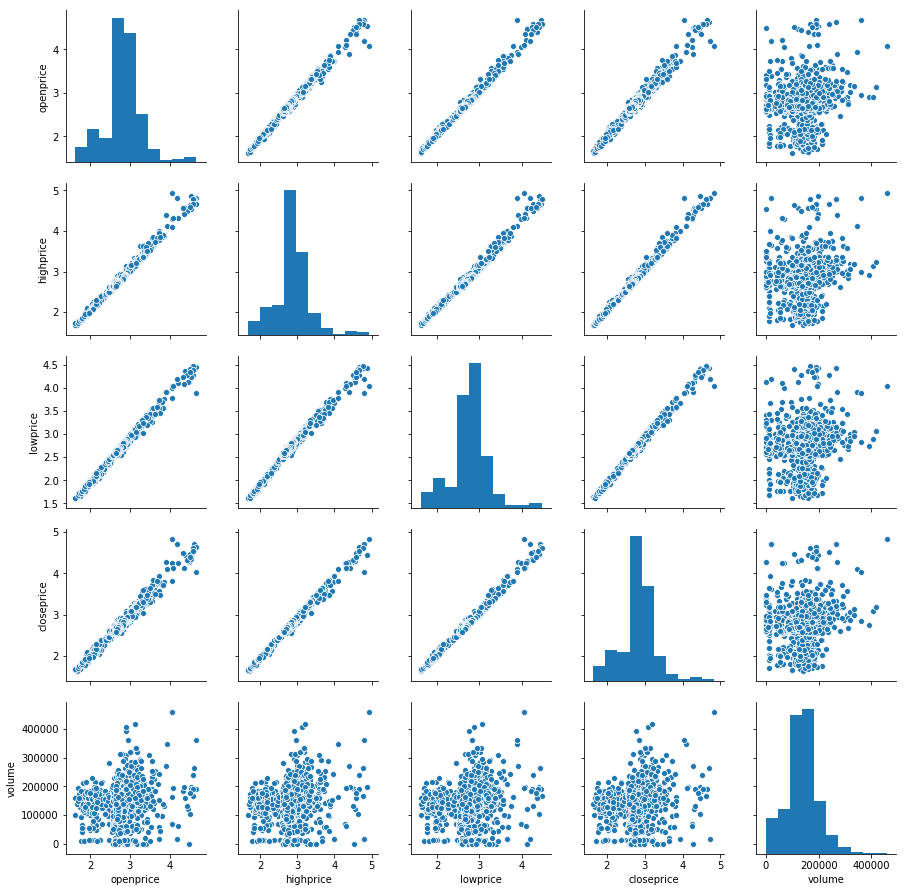

In [30]:
sns.pairplot(gas_df1)

In [31]:
oil_df1 = oil_df.loc["2015-04-01":"2019-04-15"]
oil_df1.shape

(1042, 5)

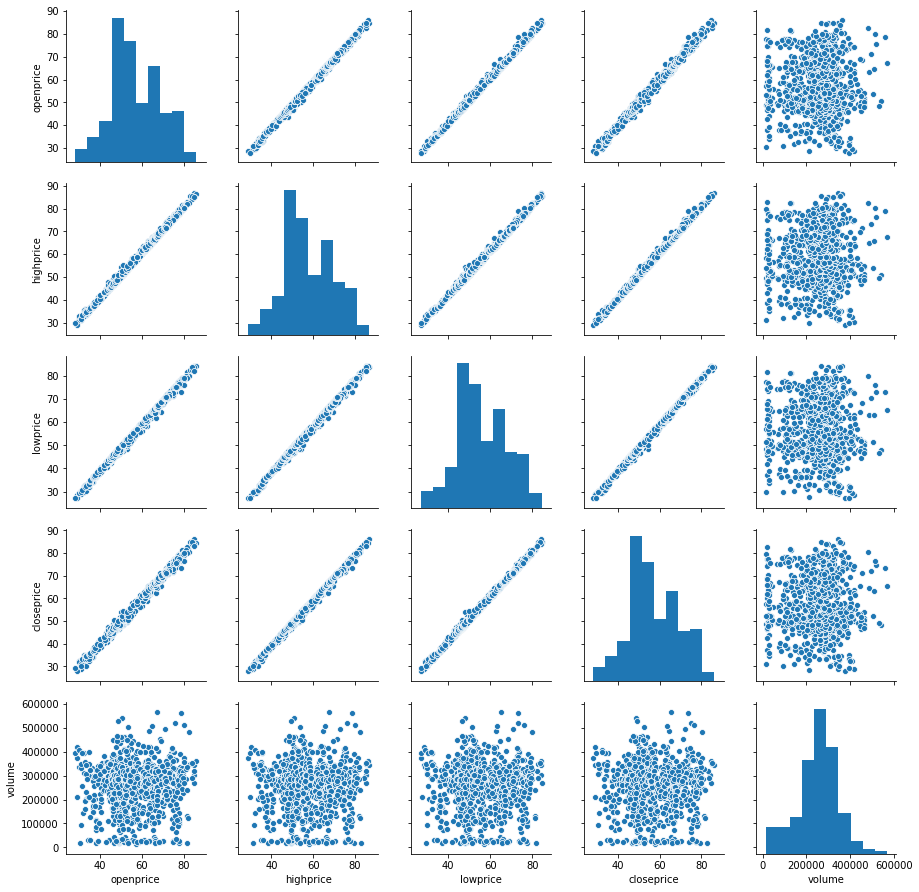

In [32]:
sns.pairplot(oil_df1)

In [33]:
silver_df1 = silver_df.loc["2015-04-01":"2019-04-15"]
silver_df1.shape


(1256, 5)

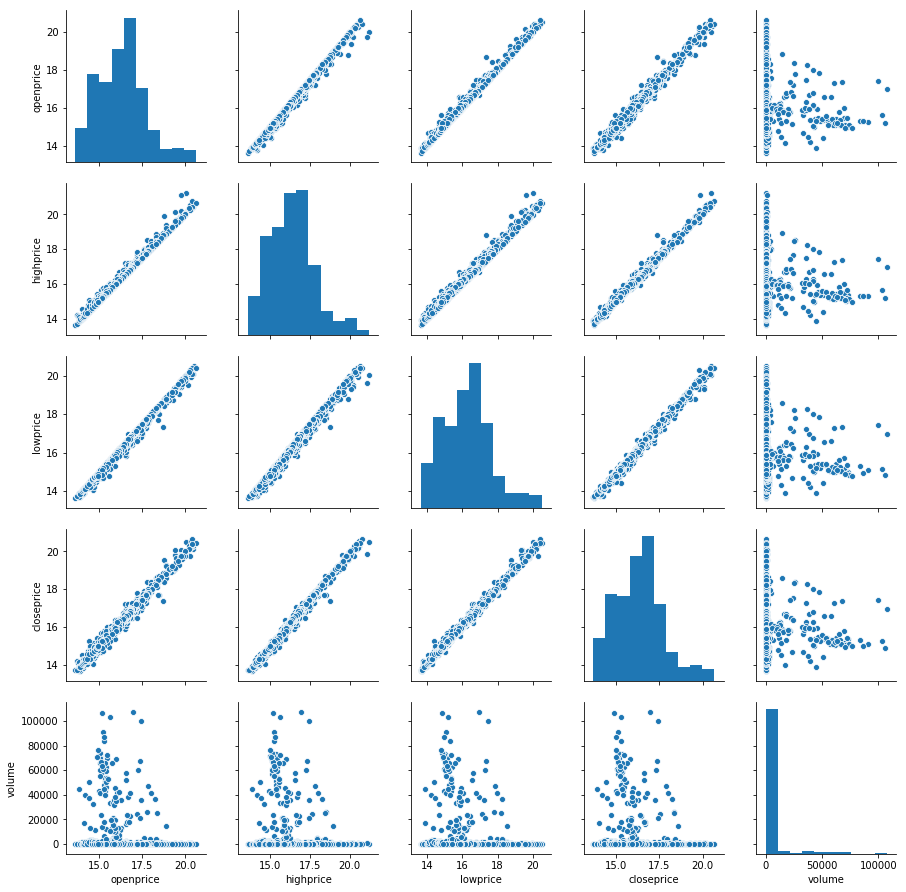

In [34]:
sns.pairplot(silver_df1)

In [35]:
gold_df1 = gold_df.loc["2015-04-01":"2019-04-15"]
gold_df1.shape

(1256, 5)

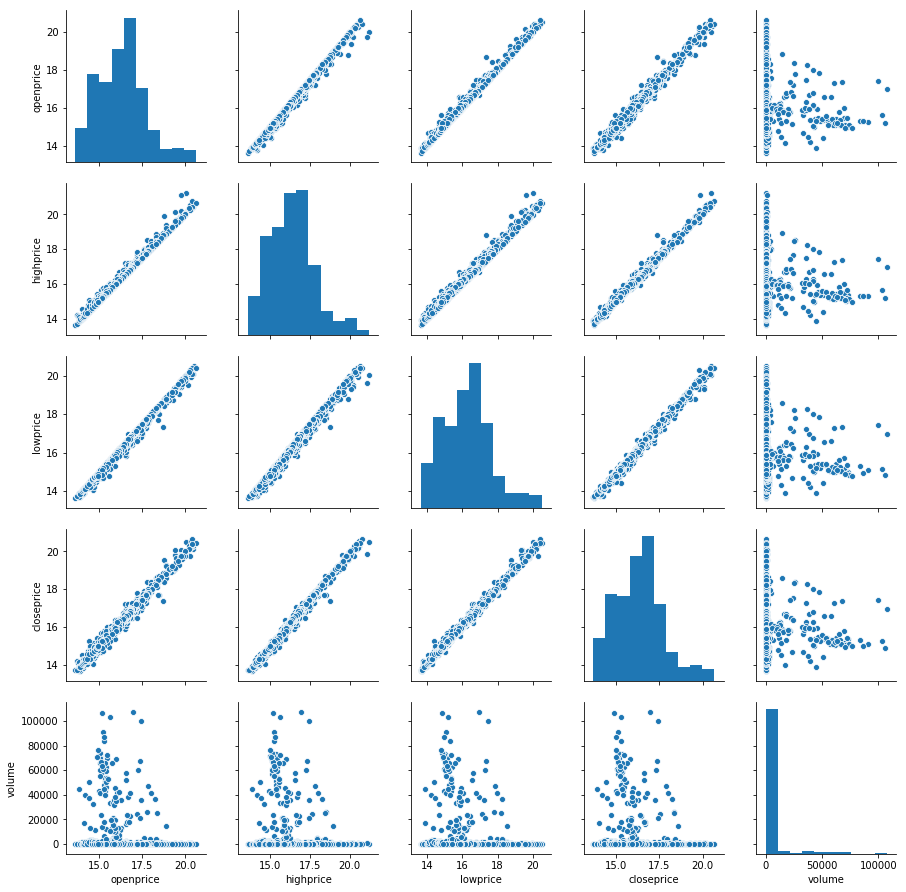

In [36]:
sns.pairplot(gold_df1)

In [4]:
oildata.head()

,Id,oildate,openprice,highprice,lowprice,closeprice,volume,created_at
0,1,2015-03-12 00:00:00,57.919998,58.810001,56.509998,57.080002,129734,2019-04-19 17:54:25
1,2,2015-03-13 00:00:00,57.029999,57.400002,54.430000,54.669998,84085,2019-04-19 17:54:25
2,3,2015-03-16 00:00:00,54.410000,54.639999,52.500000,53.439999,15638,2019-04-19 17:54:25
3,4,2015-03-17 00:00:00,54.099998,54.380001,52.570000,53.509998,240285,2019-04-19 17:54:25
4,5,2015-03-18 00:00:00,53.279999,56.840000,52.680000,55.910000,262440,2019-04-19 17:54:25


In [12]:
df = pd.DataFrame({'Date': [],
                    'OilOpenPrice':[],'OilHighPrice':[],'OilLowPrice':[],'OilClosePrice':[],'OilVolume':[],
                    'GasOpenPrice':[],'GasHighPrice':[],'GasLowPrice':[],'GasClosePrice':[],'GasVolume':[]})
df.head()

,Date,OilOpenPrice,OilHighPrice,OilLowPrice,OilClosePrice,OilVolume,GasOpenPrice,GasHighPrice,GasLowPrice,GasClosePrice,GasVolume


In [13]:
for index, row in oildata.iterrows():
     for index1, row1 in gasdata.iterrows():
            temp1 = datetime.date(pd.to_datetime(row["oildate"]))
            temp2 = datetime.date(pd.to_datetime(row1["gasdate"]))
            if(temp1 == temp2):
                df = df.append({'Date': temp1,
                                'OilOpenPrice': row["openprice"], 'OilHighPrice': row["highprice"],
                                'OilLowPrice': row["lowprice"],'OilClosePrice': row["closeprice"],
                                'OilVolume': row["volume"],
                                
                                'GasOpenPrice': row1["openprice"], 'GasHighPrice': row1["highprice"],
                                'GasLowPrice': row1["lowprice"],'GasClosePrice': row1["closeprice"],
                                'GasVolume': row1["volume"]                                                                                        
                               }, ignore_index=True)
                
                df.to_csv("Oil&Gas.csv", sep=',', encoding='utf-8')
                break
df.head()

,Date,OilOpenPrice,OilHighPrice,OilLowPrice,OilClosePrice,OilVolume,GasOpenPrice,GasHighPrice,GasLowPrice,GasClosePrice,GasVolume
0,2015-03-12,57.919998,58.810001,56.509998,57.080002,129734.0,2.828,2.864,2.725,2.734,155481.0
1,2015-03-13,57.029999,57.400002,54.430000,54.669998,84085.0,2.749,2.759,2.674,2.727,95866.0
2,2015-03-16,54.410000,54.639999,52.500000,53.439999,15638.0,2.705,2.748,2.680,2.716,82668.0
3,2015-03-17,54.099998,54.380001,52.570000,53.509998,240285.0,2.742,2.858,2.740,2.855,159236.0
4,2015-03-18,53.279999,56.840000,52.680000,55.910000,262440.0,2.854,2.935,2.775,2.920,153505.0


In [14]:
df2 = pd.DataFrame({'Date': [],
                    'GoldOpenPrice':[],'GoldHighPrice':[],'GoldLowPrice':[],'GoldClosePrice':[],'GoldVolume':[],
                    'SilverOpenPrice':[],'SilverHighPrice':[],'SilverLowPrice':[],'SilverClosePrice':[],'SilverVolume':[]
                   })

In [17]:
for index, row in golddata.iterrows():
     for index1, row1 in silverdata.iterrows():
            temp1 = datetime.date(pd.to_datetime(row["golddate"]))
            temp2 = datetime.date(pd.to_datetime(row1["silverdate"]))
            if(temp1 == temp2):
                df2 = df2.append({'Date': temp1,
                                'GoldOpenPrice': row["openprice"], 'GoldHighPrice': row["highprice"],
                                'GoldLowPrice': row["lowprice"],'GoldClosePrice': row["closeprice"],
                                'GoldVolume': row["volume"],
                                
                                'SilverOpenPrice': row1["openprice"], 'SilverHighPrice': row1["highprice"],
                                'SilverLowPrice': row1["lowprice"],'SilverClosePrice': row1["closeprice"],
                                'SilverVolume': row1["volume"]                                                                                        
                               }, ignore_index=True)
                    
                df2.to_csv("Gold&Silver.csv", sep=',', encoding='utf-8')
                break                 
df2.head()

,Date,GoldOpenPrice,GoldHighPrice,GoldLowPrice,GoldClosePrice,GoldVolume,SilverOpenPrice,SilverHighPrice,SilverLowPrice,SilverClosePrice,SilverVolume
0,2015-03-12,15.560,15.565,15.465,15.493,94.0,15.560,15.565,15.465,15.493,94.0
1,2015-03-13,15.610,15.620,15.475,15.477,59.0,15.610,15.620,15.475,15.477,59.0
2,2015-03-15,15.627,15.627,15.565,15.585,0.0,15.627,15.627,15.565,15.585,0.0
3,2015-03-16,15.690,15.715,15.500,15.601,71.0,15.690,15.715,15.500,15.601,71.0
4,2015-03-17,15.490,15.635,15.490,15.562,39.0,15.490,15.635,15.490,15.562,39.0


In [24]:
df3 = pd.DataFrame({'Date': [],
                    'GoldOpenPrice':[],'GoldHighPrice':[],'GoldLowPrice':[],'GoldClosePrice':[],'GoldVolume':[],
                    'SilverOpenPrice':[],'SilverHighPrice':[],'SilverLowPrice':[],'SilverClosePrice':[],'SilverVolume':[],
                    
                    'OilOpenPrice':[],'OilHighPrice':[],'OilLowPrice':[],'OilClosePrice':[],'OilVolume':[],
                    'GasOpenPrice':[],'GasHighPrice':[],'GasLowPrice':[],'GasClosePrice':[], 'GasVolume':[]
                   }
                  )

In [30]:
for index, row in df2.iterrows():
     for index1, row1 in df.iterrows():
            temp1 = datetime.date(pd.to_datetime(row["Date"]))
            temp2 = datetime.date(pd.to_datetime(row1["Date"]))
            if(temp1 == temp2):
                df3 = df3.append({'Date': temp1,
                                'GoldOpenPrice': row["GoldOpenPrice"], 'GoldHighPrice': row["GoldHighPrice"],
                                'GoldLowPrice': row["GoldLowPrice"],'GoldClosePrice': row["GoldClosePrice"],
                                'GoldVolume': row["GoldVolume"],
                                  
                                'SilverOpenPrice': row["SilverOpenPrice"], 'SilverHighPrice': row["SilverHighPrice"],
                                'SilverLowPrice': row["SilverLowPrice"],'SilverClosePrice': row["SilverClosePrice"],
                                'SilverVolume': row["SilverVolume"],
                                
                                'OilOpenPrice': row1["OilOpenPrice"], 'OilHighPrice': row1["OilHighPrice"],
                                'OilLowPrice': row1["OilLowPrice"],'OilClosePrice': row1["OilClosePrice"],
                                'OilVolume': row1["OilVolume"],
                                
                                'GasOpenPrice': row1["GasOpenPrice"], 'GasHighPrice': row1["GasHighPrice"],
                                'GasLowPrice': row1["GasLowPrice"],'GasClosePrice': row1["GasClosePrice"],
                                'GasVolume': row1["GasVolume"]
                                  
                                  }, ignore_index=True)
                                  
                df3.to_csv("Gold&Silver&Oil&Gas.csv", sep=',', encoding='utf-8')
                break
                                                                                                                             
df3.head()

,Date,GoldOpenPrice,GoldHighPrice,GoldLowPrice,GoldClosePrice,GoldVolume,SilverOpenPrice,SilverHighPrice,SilverLowPrice,SilverClosePrice,...,OilOpenPrice,OilHighPrice,OilLowPrice,OilClosePrice,OilVolume,GasOpenPrice,GasHighPrice,GasLowPrice,GasClosePrice,GasVolume
0,2015-03-12,15.560,15.565,15.465,15.493,94.0,15.560,15.565,15.465,15.493,...,57.919998,58.810001,56.509998,57.080002,129734.0,2.828,2.864,2.725,2.734,155481.0
1,2015-03-13,15.610,15.620,15.475,15.477,59.0,15.610,15.620,15.475,15.477,...,57.029999,57.400002,54.430000,54.669998,84085.0,2.749,2.759,2.674,2.727,95866.0
2,2015-03-16,15.690,15.715,15.500,15.601,71.0,15.690,15.715,15.500,15.601,...,54.410000,54.639999,52.500000,53.439999,15638.0,2.705,2.748,2.680,2.716,82668.0
3,2015-03-17,15.490,15.635,15.490,15.562,39.0,15.490,15.635,15.490,15.562,...,54.099998,54.380001,52.570000,53.509998,240285.0,2.742,2.858,2.740,2.855,159236.0
4,2015-03-18,15.475,15.900,15.450,15.525,19.0,15.475,15.900,15.450,15.525,...,53.279999,56.840000,52.680000,55.910000,262440.0,2.854,2.935,2.775,2.920,153505.0


In [32]:
CombinedData = pd.DataFrame({'Date': [],
                    'Sector':[],'Subsector':[],'CompanyName':[],'StockCode':[],'StockOpenPrice':[],'StockHighPrice':[],
                    'StockLowPrice':[],'StockClosePrice':[],"StockVolume":[],
                             
                    'GoldOpenPrice':[],'GoldHighPrice':[],'GoldLowPrice':[],'GoldClosePrice':[],'GoldVolume':[],
                    'SilverOpenPrice':[],'SilverHighPrice':[],'SilverLowPrice':[],'SilverClosePrice':[],'SilverVolume':[],
                    
                    'OilOpenPrice':[],'OilHighPrice':[],'OilLowPrice':[],'OilClosePrice':[],'OilVolume':[],
                    'GasOpenPrice':[],'GasHighPrice':[],'GasLowPrice':[],'GasClosePrice':[],'GasVolume':[]
                   })
CombinedData.head()

,Date,Sector,Subsector,CompanyName,StockCode,StockOpenPrice,StockHighPrice,StockLowPrice,StockClosePrice,StockVolume,...,OilOpenPrice,OilHighPrice,OilLowPrice,OilClosePrice,OilVolume,GasOpenPrice,GasHighPrice,GasLowPrice,GasClosePrice,GasVolume


In [ ]:
for index, row in stockdata.iterrows():
     for index1, row1 in df3.iterrows():
            temp1 = datetime.date(pd.to_datetime(row["stockdate"]))
            temp2 = datetime.date(pd.to_datetime(row1["Date"]))
            if(temp1 == temp2):
                CombinedData = CombinedData.append({'Date': temp2,
                                                    
                                  'CompanyName':row["companyname"],'StockCode':row["stockcode"],
                                  'Sector':row["sector"],'Subsector':row["subsector"],
                                  'StockOpenPrice':row["openprice"],'StockHighPrice':row["highprice"],
                                  'StockLowPrice':row["lowprice"],'StockClosePrice':row["lastprice"],
                                  'StockVolume':row["volume"],
                                  
                                  'GoldOpenPrice': row1["GoldOpenPrice"], 'GoldHighPrice': row1["GoldHighPrice"],
                                  'GoldLowPrice': row1["GoldLowPrice"],'GoldClosePrice': row1["GoldClosePrice"],
                                  'GoldVolume': row1["GoldVolume"],
                                  
                                  'SilverOpenPrice': row1["SilverOpenPrice"], 'SilverHighPrice': row1["SilverHighPrice"],
                                  'SilverLowPrice': row1["SilverLowPrice"],'SilverClosePrice': row1["SilverClosePrice"],
                                  'SilverVolume': row1["SilverVolume"],
                                
                                  'OilOpenPrice': row1["OilOpenPrice"], 'OilHighPrice': row1["OilHighPrice"],
                                  'OilLowPrice': row1["OilLowPrice"],'OilClosePrice': row1["OilClosePrice"],
                                  'OilVolume': row1["OilVolume"],
                                
                                  'GasOpenPrice': row1["GasOpenPrice"], 'GasHighPrice': row1["GasHighPrice"],
                                  'GasLowPrice': row1["GasLowPrice"],'GasClosePrice': row1["GasClosePrice"],
                                  'GasVolume': row1["GasVolume"]                                                                                          
                                                   }, 
                                 ignore_index=True)
                
                CombinedData.to_csv("CombinedData.csv", sep=',', encoding='utf-8')
                break
                
CombinedData.head()

In [ ]:
CombinedData.describe